In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
train_data = pd.read_csv('data/train_selected.csv')
train_data.columns = ['ID', 'Cycle', 'S1','S2','S3','S4','ttf', 'label bnc']
xtrain = train_data.drop([ 'ID','S2', 'S4','ttf', 'label bnc'], axis=1).values
ytrain = train_data['ttf'].values

In [3]:
test_data = pd.read_csv('data/test_selected_ttf.csv')
test_data.columns = ['ID', 'Cycle', 'S1','S2','S3','S4','ttf', 'label bnc']
xtest = test_data.drop(['ID','S2','S4','ttf', 'label bnc'], axis=1).values
ytest = test_data['ttf'].values

In [4]:
x = np.array(xtrain)
xt = np.array(xtest)
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)
xtest_norm = scaler.fit_transform(xt)

In [5]:
def plot_residual(model, ytrain, y_pred_train, ytest, y_pred_test):
    
    """Print the regression residuals.
    
    Args:
        model (str): The model name identifier
        y_train (series): The training labels
        y_train_pred (series): Predictions on training data
        y_test (series): The test labels
        y_test_pred (series): Predictions on test data
        
    Returns:
        Plot of regression residuals
    
    """
    
    plt.scatter(y_pred_train, y_pred_train - ytrain, c='blue', marker='o', label='Training data')
    plt.scatter(y_pred_test, y_pred_test - ytest, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
   # plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

In [6]:
# Multi_Linear Regression #
ml = LinearRegression()
ml.fit(x_norm, ytrain)

LinearRegression()

In [7]:
y_pred_test = ml.predict(xtest_norm)
y_pred_train = ml.predict(x_norm)

In [8]:
r2_score(ytest, y_pred_test)

0.024882102942295314

In [9]:
r2_score(ytrain, y_pred_train)

0.6393360503642229

In [10]:
np.sqrt(mean_squared_error(y_pred_test, ytest))

41.03536831618402

In [11]:
np.sqrt(mean_squared_error(y_pred_train, ytrain))

41.365225239291696

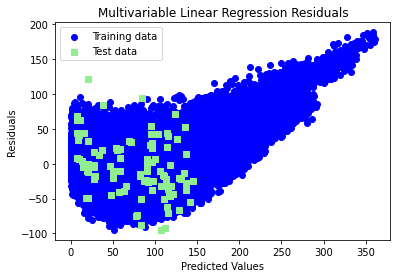

In [12]:
plot_residual('Multivariable Linear Regression', y_pred_train, ytrain, y_pred_test, ytest)
# The test data outside the training data is not an anomaly just noise. 

Text(0, 0.5, 'Predicted Y values')

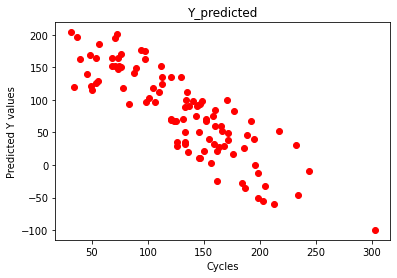

In [13]:
xg = test_data['Cycle'].values
plt.scatter(xg, y_pred_test, color = 'red')
plt.title('Y_predicted')
plt.xlabel('Cycles')
plt.ylabel('Predicted Y values')
#END OF LINEAR

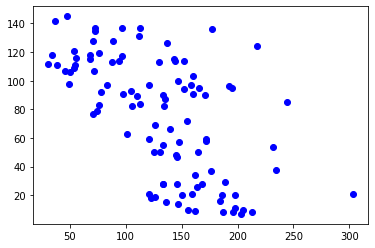

In [14]:
plt.scatter(xg, ytest, color = 'blue')
#Actual ytest is a lot less correlated.

In [15]:
def plot_residual(model, ytrain, y_pred_train_n, ytest, y_pred_nonlin):
    
    """Print the regression residuals.
    
    Args:
        model (str): The model name identifier
        y_train (series): The training labels
        y_train_pred (series): Predictions on training data
        y_test (series): The test labels
        y_test_pred (series): Predictions on test data
        
    Returns:
        Plot of regression residuals
    
    """
    
    plt.scatter(y_pred_train_n, y_pred_train_n - ytrain, c='blue', marker='o', label='Training data')
    plt.scatter(y_pred_nonlin, y_pred_nonlin - ytest, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    #plt.ylim(-5, 5)
    plt.legend(loc='upper left')
    #plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

In [16]:
# NON_LINEAR REGRESSION #
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
xtrainpoly = poly.fit_transform(xtrain)
xtestpoly = poly.fit_transform(xtest)

In [17]:
lin_reg = LinearRegression()
mdl = lin_reg.fit(xtrainpoly, ytrain)

In [18]:
y_pred_nonlin = lin_reg.predict(xtestpoly)
y_pred_train_n = lin_reg.predict(xtrainpoly)

In [19]:
r2_score(ytest, y_pred_nonlin)
#Better without normalising

0.6031304764950417

In [20]:
r2_score(ytrain, y_pred_train_n)

0.697487563799366

In [207]:
np.sqrt(mean_squared_error(ytest, y_pred_nonlin))
#better without normalised

26.17903579788984

In [208]:
np.sqrt(mean_squared_error(ytrain, y_pred_train_n))

37.88398385269212

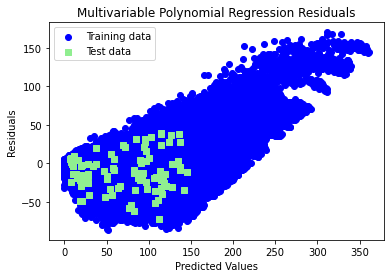

In [81]:
plot_residual('Multivariable Polynomial Regression', y_pred_train_n, ytrain, y_pred_nonlin, ytest)

Text(0, 0.5, 'Predicted Non-linear Y value')

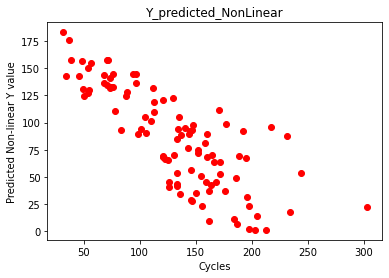

In [82]:
plt.scatter(xg, y_pred_nonlin, color = 'red')
plt.title('Y_predicted_NonLinear')
plt.xlabel('Cycles')
plt.ylabel('Predicted Non-linear Y value')

Text(0, 0.5, 'Test Y value')

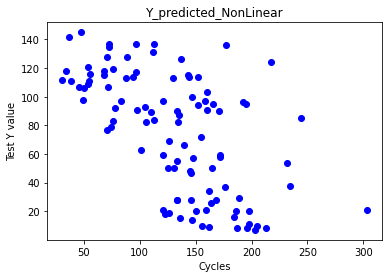

In [89]:
plt.scatter(xg, ytest, color = 'blue')
plt.title('Y_predicted_NonLinear')
plt.xlabel('Cycles')
plt.ylabel('Test Y value')

In [84]:
def plot_residual(model, ytrain, y_train_pred, ytest, y_test_pred):
    
    """Print the regression residuals.
    
    Args:
        model (str): The model name identifier
        y_train (series): The training labels
        y_train_pred (series): Predictions on training data
        y_test (series): The test labels
        y_test_pred (series): Predictions on test data
        
    Returns:
        Plot of regression residuals
    
    """
    
    plt.scatter(y_train_pred, y_train_pred - ytrain, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - ytest, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    #plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

In [85]:
def get_regression_metrics(model, actual, predicted):
    
    """Calculate main regression metrics.
    
    Args:
        model (str): The model name identifier
        actual (series): Contains the test label values
        predicted (series): Contains the predicted values
        
    Returns:
        dataframe: The combined metrics in single dataframe
    
    
    """
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }

    #return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics


In [216]:
from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor(n_estimators=100, max_features=2, max_depth=4, n_jobs=-1, random_state=1) # selected features
rf = RandomForestRegressor(n_estimators=100, max_features=6, max_depth=3, n_jobs=-1, random_state=1) # original features
#rf = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=7, n_jobs=-1, random_state=1) # orig + extrcted 
#rf_r = RandomizedSearchCV(rf, param_dist, cv = 6)
rf.fit(x_norm, ytrain)
y_test_predict = rf.predict(xtest_norm)
y_train_predict = rf.predict(x_norm)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(ytrain, y_train_predict)), 
      (metrics.r2_score(ytest, y_test_predict))))

rf_metrics = get_regression_metrics('Random Forest Regression', ytest, y_test_predict)
rf_metrics

R^2 training: 0.673, R^2 test: 0.263


,Random Forest Regression
Root Mean Squared Error,35.664504
Mean Absolute Error,28.297809
R^2,0.263432
Explained Variance,0.325509


In [217]:
np.sqrt(mean_squared_error(ytrain, y_train_predict))

39.389821955755544

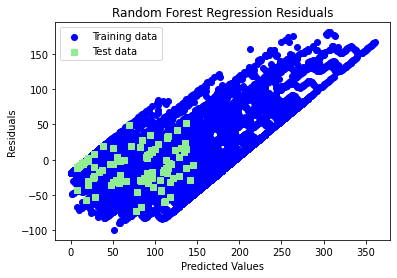

In [87]:
plot_residual('Random Forest Regression', y_train_predict, ytrain, y_test_predict, ytest)
# residual is the variation between the actual and predicted values by the model and how the variation changes across all values.